In [51]:
import pandas
pandas.options.display.max_columns=999

import sbmlcore

The below needs to be either `'traintest'`,`'validation-samples'`, `'validation-mutations'`,or `'mic'`

In [52]:
filestem = 'validation-mutations'

In [53]:
df2 = pandas.read_csv('data/ds-' + filestem+'-phen.csv')
df2.rename(columns={'MUTATION':'mutation', 'CONSISTENT_PHENOTYPE':'phenotype'}, inplace=True)
df2[:3]


,mutation,phenotype
0,A102P,U
1,A102R,S
2,A102T,R


In [54]:
dataset = sbmlcore.FeatureDataset(df2, species='M. tuberculosis', gene='pncA')
dataset.df['segid'] = 'A'
dataset.df[:3]

,mutation,phenotype,segid
0,A102P,U,A
1,A102R,S,A
2,A102T,R,A


### add change in amino acid sidechain volume

In [55]:
features = [sbmlcore.AminoAcidVolumeChange(), sbmlcore.AminoAcidHydropathyChangeKyteDoolittle(), sbmlcore.AminoAcidPiChange(), sbmlcore.AminoAcidMWChange(), sbmlcore.AminoAcidRogovChange()]
dataset.add_feature(features)
dataset.df[:3]

,mutation,phenotype,segid,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov
0,A134D,U,A,22.5,-5.3,-3.23,44.0,0.029
1,A143D,U,A,22.5,-5.3,-3.23,44.0,0.029
2,A28D,U,A,22.5,-5.3,-3.23,44.0,0.029


### add features measured using STRIDE

In [56]:
dataset = dataset + sbmlcore.Stride('./data/reference/3PL1-PZA.pdb')
dataset.df['secondary_structure_codes'] = pandas.Categorical(dataset.df.secondary_structure, categories=dataset.df.secondary_structure.unique()).codes
dataset.df.drop(columns=['secondary_structure', 'secondary_structure_long', 'B', 'C', 'E', 'G', 'H', 'T'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes
0,A,A3E,R,49.8,-5.3,-2.78,58.0,-0.033,-126.53,153.85,0.0,1.0,1.0,0
1,A,A28D,U,22.5,-5.3,-3.23,44.0,0.029,-62.69,-39.77,0.0,1.0,2.0,1
2,A,A28T,U,27.5,-2.5,-0.40,30.0,0.248,-62.69,-39.77,0.0,1.0,2.0,1


In [57]:
dataset = dataset + sbmlcore.TempFactors('data/reference/3PL1-PZA.pdb')
dataset.df[:5]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.00,-35.20,86.2,2.0,0.0,3,59.720001
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.00,-35.20,86.2,2.0,0.0,3,59.720001
3,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001
4,A,R2L,U,-6.7,8.3,-4.78,-43.0,-0.090,-117.94,133.99,54.7,2.0,0.0,0,53.990002


<AxesSubplot:>

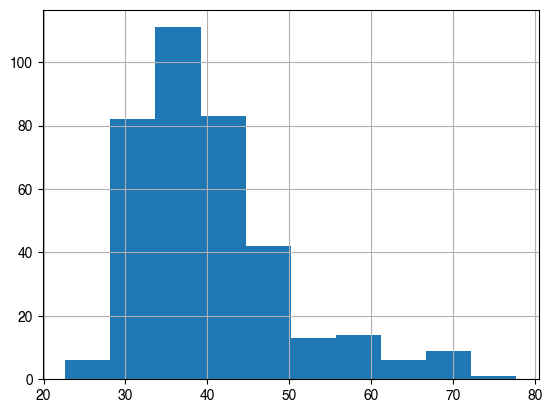

In [58]:
dataset.df.temp_factor.hist()

### add residue depth as measured by BioPython

In [59]:
dataset = dataset + sbmlcore.ResidueDepth('data/reference/3PL1-PZA.pdb', segids=['A'])
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H6) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'N' for Atom (name=N5) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'C' for Atom (name=C4) with given element ''
  warnings.warn(msg, PDBConstructionWarning)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/Bio/PDB/Atom.py:232: PDBConstructionWarning: Used element 'H' for Atom (name=H4) with given element ''
  warnings

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049


### add effect on protein stability as estimated by DeepDDG

In [60]:
dataset = dataset + sbmlcore.DeepDDG('./data/features/3pl1.ddg')
dataset.df.deep_ddG.fillna(value=0, inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.407
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-1.017
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.780


Most mutations are predicted to be destabilising as expected

<AxesSubplot:>

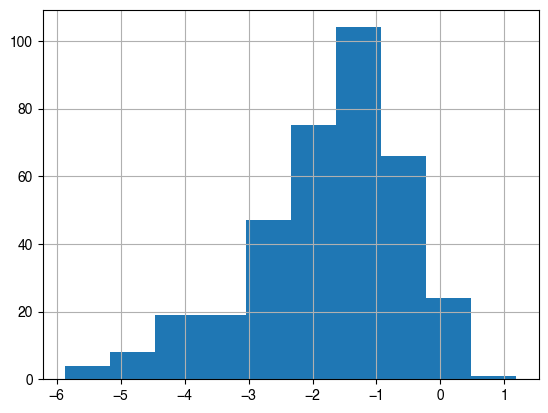

In [61]:
dataset.df.deep_ddG.hist()

### add effect on protein stability estimated by RaSP

<AxesSubplot:>

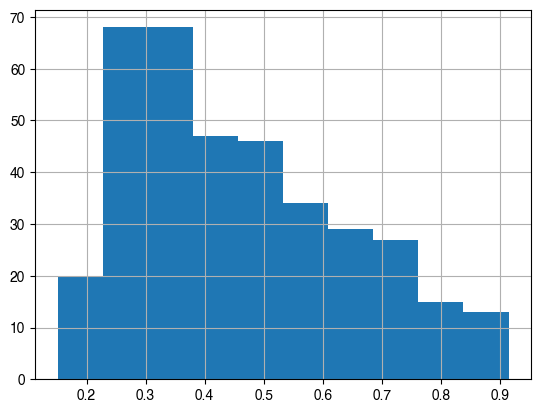

In [62]:
# a = sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
# a.results.rasp_score_ml.hist()
dataset = dataset + sbmlcore.RaSP('data/features/cavity_pred_3PL1_A.csv')
dataset.df.drop(columns=['rasp_score_ml'], inplace=True)
dataset.df.rasp_score_ml_fermi.hist()

In [63]:
dataset = dataset + sbmlcore.SNAP2('./data/features/3pl1-snap2-with-segids.csv', offsets={'A': 0})
dataset.df.drop(columns=['snap2_accuracy'], inplace=True)
dataset.df[:3]

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44


### add distance from the catalytic Iron 

In [64]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname FE2', 'dist_FE2')
dataset.df[:3]

/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70,29.948318
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.0,-35.2,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44,29.948318


### add distance from the bound pyrazinamide

In [65]:
dataset = dataset + sbmlcore.StructuralDistances('data/reference/3PL1-PZA.pdb', 'resname PZA', 'dist_PZA', infer_masses=False)


/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/Users/fowler/Library/Python/3.10/lib/python/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [66]:
dataset.df

,segid,mutation,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA
0,A,M1I,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663
1,A,M1K,U,5.7,-5.8,4.00,-3.0,-0.712,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70,29.948318,27.641663
2,A,M1R,U,10.5,-6.4,5.02,25.0,-0.681,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44,29.948318,27.641663
3,A,M1T,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663
4,A,R2L,U,-6.7,8.3,-4.78,-43.0,-0.090,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-0.708,3.035567,2.433114,0.242800,44,27.459823,24.722696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,A,V180L,U,26.7,-0.4,0.02,14.1,0.365,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.269,2.623741,2.433114,0.320487,56,23.910008,20.039579
363,A,L182F,S,23.2,-1.0,-0.50,34.0,0.367,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-0.804,2.433114,3.207937,0.377965,47,25.183472,20.530870
364,A,L182S,U,-77.7,-4.6,-0.30,-26.1,0.015,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.864,2.433114,2.844502,0.614837,71,25.183472,20.530870
365,A,L182W,U,61.1,-4.7,-0.09,73.0,0.002,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.198,2.433114,4.250501,0.485652,75,25.183472,20.530870


### add mCSM predicted stability scores

In [67]:
 # add mCSM stability
df = pandas.read_csv('data/features/3pl1-mcsm_stability.txt', sep='\t')

def create_mutation(row):
    return row['WILD_RES']+str(row.RES_POS)+row['MUT_RES']

df['mutation'] = df.apply(create_mutation, axis=1)
df = df[['mutation','RSA','PRED_DDG']]
df.rename(columns={'RSA': 'mcsm_stability_rsa', 'PRED_DDG': 'mcsm_stability_ddG'}, inplace=True)
df.set_index('mutation', inplace=True)
df
dataset.df.set_index('mutation', inplace=True)
dataset.df = dataset.df.join(df,how='left')
dataset.df.reset_index(inplace=True)
dataset.df

,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG
0,M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771
1,M1K,A,U,5.7,-5.8,4.00,-3.0,-0.712,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70,29.948318,27.641663,54.8,-0.214
2,M1R,A,U,10.5,-6.4,5.02,25.0,-0.681,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44,29.948318,27.641663,54.8,0.417
3,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367
4,R2L,A,U,-6.7,8.3,-4.78,-43.0,-0.090,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-0.708,3.035567,2.433114,0.242800,44,27.459823,24.722696,27.5,-0.236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,V180L,A,U,26.7,-0.4,0.02,14.1,0.365,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.269,2.623741,2.433114,0.320487,56,23.910008,20.039579,0.0,-1.002
363,L182F,A,S,23.2,-1.0,-0.50,34.0,0.367,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-0.804,2.433114,3.207937,0.377965,47,25.183472,20.530870,13.4,-1.200
364,L182S,A,U,-77.7,-4.6,-0.30,-26.1,0.015,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.864,2.433114,2.844502,0.614837,71,25.183472,20.530870,13.4,-2.113
365,L182W,A,U,61.1,-4.7,-0.09,73.0,0.002,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.198,2.433114,4.250501,0.485652,75,25.183472,20.530870,13.4,-1.353


In [68]:
df = pandas.read_csv('data/features/3pl1-mapp_scores.csv')
df2 = pandas.melt(df, id_vars='Position',value_vars=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y'])
df2.rename(columns={'Position': 'codon', 'variable': 'alt_amino_acid', 'value': 'mapp_score'}, inplace=True)
df2.set_index(['codon', 'alt_amino_acid'], inplace=True)

def split_mutation(row):
    return pandas.Series([int(row.mutation[1:-1]), row.mutation[-1]])

df2

dataset.df[['codon', 'alt_amino_acid']] = dataset.df.apply(split_mutation, axis=1)
dataset.df.set_index(['codon', 'alt_amino_acid'], inplace=True)
dataset.df = dataset.df.join(df2,how='left')
dataset.df.reset_index(inplace=True)
dataset.df.drop(columns=['codon', 'alt_amino_acid'], inplace=True)
dataset.df


,mutation,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
0,M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771,21.99
1,M1K,A,U,5.7,-5.8,4.00,-3.0,-0.712,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70,29.948318,27.641663,54.8,-0.214,27.72
2,M1R,A,U,10.5,-6.4,5.02,25.0,-0.681,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44,29.948318,27.641663,54.8,0.417,32.16
3,M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
4,R2L,A,U,-6.7,8.3,-4.78,-43.0,-0.090,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-0.708,3.035567,2.433114,0.242800,44,27.459823,24.722696,27.5,-0.236,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,V180L,A,U,26.7,-0.4,0.02,14.1,0.365,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.269,2.623741,2.433114,0.320487,56,23.910008,20.039579,0.0,-1.002,2.13
363,L182F,A,S,23.2,-1.0,-0.50,34.0,0.367,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-0.804,2.433114,3.207937,0.377965,47,25.183472,20.530870,13.4,-1.200,2.22
364,L182S,A,U,-77.7,-4.6,-0.30,-26.1,0.015,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.864,2.433114,2.844502,0.614837,71,25.183472,20.530870,13.4,-2.113,3.63
365,L182W,A,U,61.1,-4.7,-0.09,73.0,0.002,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.198,2.433114,4.250501,0.485652,75,25.183472,20.530870,13.4,-1.353,4.20


In [69]:
dataset.df.phenotype.value_counts()

U    168
R    155
S     44
Name: phenotype, dtype: int64

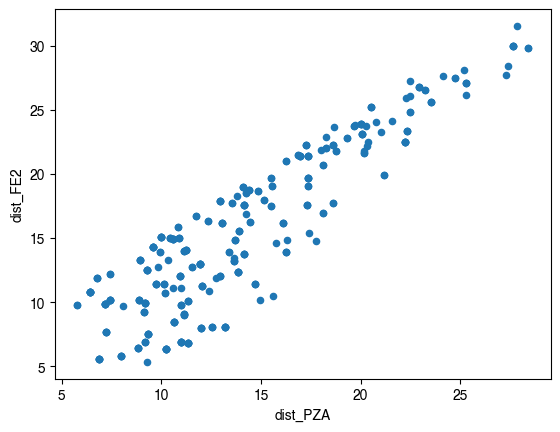

In [70]:
axes = dataset.df.plot.scatter(x='dist_PZA', y='dist_FE2')

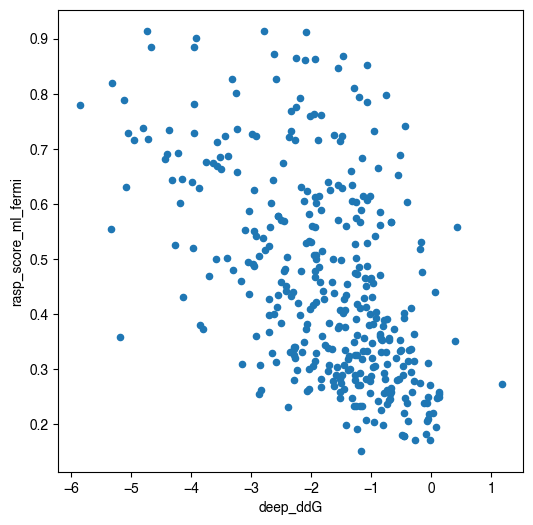

In [71]:
axes = dataset.df.plot.scatter(x='deep_ddG', y='rasp_score_ml_fermi', figsize=(6,6))

In [72]:
axes.get_figure().savefig('foo.pdf')

In [73]:
dataset.df.to_csv('data/ds-'+filestem+'-phen-features.csv', index=False)

In [74]:
dataset.df.set_index('mutation', inplace=True)

In [75]:
dataset.df

,segid,phenotype,d_volume,d_hydropathy_KD,d_Pi,d_MW,d_rogov,phi,psi,residue_sasa,n_hbond_acceptors,n_hbond_donors,secondary_structure_codes,temp_factor,depth,deep_ddG,rasp_wt_nlf,rasp_mt_nlf,rasp_score_ml_fermi,snap2_score,dist_FE2,dist_PZA,mcsm_stability_rsa,mcsm_stability_ddG,mapp_score
mutation,,,,,,,,,,,,,,,,,,,,,,,,,
M1I,A,S,3.8,2.6,0.28,-18.0,-0.452,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.407,3.785957,2.854018,0.236948,7,29.948318,27.641663,54.8,-0.771,21.99
M1K,A,U,5.7,-5.8,4.00,-3.0,-0.712,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.017,3.785957,2.828313,0.278564,70,29.948318,27.641663,54.8,-0.214,27.72
M1R,A,U,10.5,-6.4,5.02,25.0,-0.681,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-0.780,3.785957,3.035567,0.255298,44,29.948318,27.641663,54.8,0.417,32.16
M1T,A,R,-46.8,-2.6,-0.14,-30.1,-0.548,0.00,-35.20,86.2,2.0,0.0,3,59.720001,2.103049,-1.096,3.785957,2.896883,0.281366,52,29.948318,27.641663,54.8,-0.367,25.97
R2L,A,U,-6.7,8.3,-4.78,-43.0,-0.090,-117.94,133.99,54.7,2.0,0.0,0,53.990002,2.372958,-0.708,3.035567,2.433114,0.242800,44,27.459823,24.722696,27.5,-0.236,2.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V180L,A,U,26.7,-0.4,0.02,14.1,0.365,-73.47,140.70,5.4,0.0,1.0,3,43.340000,2.863976,-2.269,2.623741,2.433114,0.320487,56,23.910008,20.039579,0.0,-1.002,2.13
L182F,A,S,23.2,-1.0,-0.50,34.0,0.367,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-0.804,2.433114,3.207937,0.377965,47,25.183472,20.530870,13.4,-1.200,2.22
L182S,A,U,-77.7,-4.6,-0.30,-26.1,0.015,-106.70,110.91,50.6,0.0,0.0,0,44.919998,2.103581,-1.864,2.433114,2.844502,0.614837,71,25.183472,20.530870,13.4,-2.113,3.63
